# Instagram reach analysis

In [10]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
df=pd.read_csv("Instagram data.csv",encoding="latin1")

In [11]:

df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


# Analyzing Instagram Reach

C:\Users\at\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



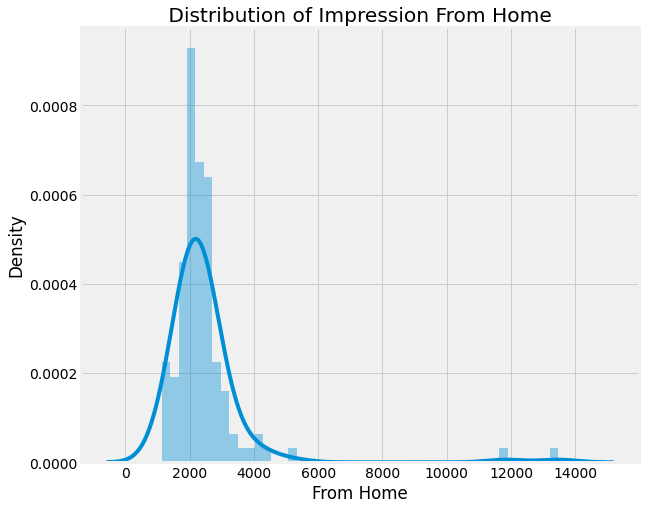

In [111]:
plt.figure(figsize=(10.,8))
plt.style.use('fivethirtyeight')
plt.title(" Distribution of Impression From Home ")
sns.distplot(df["From Home"])
plt.show()


In [ ]:
plt.figure(figsize=(10,8))
plt.title("distribution of Impression From Hastags")
sns.distplot(df['From Hashtags'])
plt.show()



In [ ]:
plt.figure(figsize=(8,6))
plt.title("Distribution of imprssioin From Explore")
sns.distplot(df["From Explore"])
plt.show()

# Now let’s have a look at the percentage of impressions I get from various sources on Instagram

In [ ]:
home=df["From Home"].sum()
hashtags=df["From Hashtags"].sum()
explore=df["From Explore"].sum()
other=df["From Other"].sum()

labels=["Home","Hashtags","Explore","Other"]
values=[home,hashtags,explore,other]


fig= px.pie(df,values=values, names=labels,
           title="Impresson on Instagram posts from various sources ",hole=0.5)
fig.show()


# Analyzing Content

In [ ]:
text=" ".join(i for i in df.Caption)
stopwords= set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use("classic")
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
# plt.aixs("off")

plt.show()



In [ ]:
txt=" ".join(i for i in df.Hashtags)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords, background_color="white").generate(txt)
plt.style.use("classic")
plt.figure(figsize=(14,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

# Analyzing Relationships

In [14]:
figure=px.scatter(df,x="Impressions",
                 y="Likes",size="Likes", trendline="ols", title="Relationship betwee Liksa & Impression")
figure.show()

In [15]:
# 

In [20]:
figur=px.scatter(df,x="Impressions",y="Shares",size="Shares",
                  trendline="ols",title="Relationship between shares and Imporession ")
figure.show()

In [21]:

# fghjk

In [24]:
figure=px.scatter(df,x="Impressions",y="Saves",trendline="ols",
                 title="Relationship between saves and Implressions")
figure.show()

# Correletaion

In [34]:
correleation= df.corr()
correleation["Impressions"].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

# Analyzing conversion Rate
In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. 
 The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s 
 have a look at the conversation rate of my Instagram account:

Fourmula
# (Follows/Profile Visits) * 100

In [38]:
conversion_rate=(df["Follows"].sum()/df["Profile Visits"].sum())*100
conversion_rate

41.00265604249668

In [40]:
figure=px.scatter(df,x="Follows",y="Profile Visits",size="Follows",
                  trendline="ols",title="Relationship between Follows and Profile visits ")
figure.show()

# Instagram Reach Prediction Model
Now in this section, I will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model

In [76]:
x=np.array(df[["Likes","Saves","Comments",
           "Shares","Profile Visits","Follows"]])
y=np.array(df["Impressions"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.12,
                                               random_state=42)

In [77]:
model= PassiveAggressiveRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\at\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



0.7463142526926193

In [102]:
# Features=[["Likes","Saves","Comments","Shares","Profile Visits","Follows"]]
features=np.array([[162.0,98.0,9.0,9.0,35.0,2.0]])
model.predict(features)

array([5394], dtype=int64)

# Accuracy  of  Model

In [110]:
model=LogisticRegression()
model.fit(x_train,y_train)
(accuracy_score(y_train,model.predict(x_train)))*100

83.65384615384616

# summary

So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python. If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in. I hope you liked this article on the task of Instagram Reach Analysis using Python. Feel free to ask valuable questions in the comments section below.

